In [3]:
#Paso 1: Carga y Exploración Inicial de Datos
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Cargar el dataset de Breast Cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

# Exploración inicial de los datos
print(X.head())
print(X.info())
print(X.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [4]:
#Paso 2: Preprocesamiento de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#Paso 3: Entrenamiento del Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística con hiperparámetros específicos
model = LogisticRegression(penalty='l2',           # Tipo de regularización L2 (Ridge)
C=1.0,                   # Inverso de la fuerza de regularización
solver='lbfgs',          # Algoritmo para la optimización
max_iter=100,            # Número máximo de iteraciones
tol=1e-4,                # Tolerancia para el criterio de parada
random_state=42)         # Semilla para la reproducibilidad

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Exactitud: 0.9736842105263158
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Matriz de Confusión:
[[41  2]
 [ 1 70]]


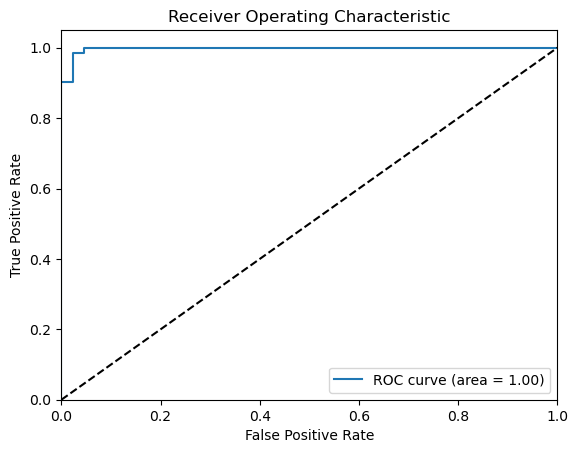

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

In [8]:
# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Mejores hiperparámetros encontrados:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Exactitud del mejor modelo: 0.9912280701754386
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Matriz de Confusión:
[[42  1]
 [ 0 71]]


In [9]:
###RandommizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir el espacio de hiperparámetros
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),  # Genera valores entre 0.001 y 1000 en una escala logarítmica
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

In [10]:
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Ejecutar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

# Evaluar el modelo
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Exactitud del mejor modelo (Random Search): {accuracy_random}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_random))

# Matriz de Confusión
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
print('Matriz de Confusión:')
print(conf_matrix_random)

Mejores hiperparámetros encontrados:
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 0.1}
Exactitud del mejor modelo (Random Search): 0.9912280701754386
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Matriz de Confusión:
[[42  1]
 [ 0 71]]
